<a href="https://colab.research.google.com/github/SofiaT08/Business-Intelligence-/blob/main/Trabajo_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Trabajo Final**

**Modelo Naive Bayes**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

#**Descripción de las variables:**#

-Smoking:
Indica si la persona fuma actualmente o ha fumado regularmente.
Valores: "Yes" / "No"

-AlcoholDrinking:
Indica si la persona consume alcohol en exceso (bebidas alcohólicas frecuentes).
Valores: "Yes" / "No"

-PhysicalHealth:
Número de días en el último mes en que la persona reportó tener mala salud física (0–30 días).
Tipo: Numérica

-MentalHealth:
Número de días en el último mes en que la persona reportó tener mala salud mental (ansiedad, depresión, etc.).
Tipo: Numérica

-DiffWalking:
Indica si la persona tiene dificultad para caminar o subir escaleras.
Valores: "Yes" / "No"

-Sex:
Género de la persona.
Valores: "Male" / "Female"

-AgeCategory:
Rango de edad en el que se encuentra la persona.
Valores categóricos como: '18-24', '25-29', ..., '80 or older'

-Diabetic:
Indica si la persona tiene diabetes.
Valores: "Yes", "No", "No, borderline diabetes", "Yes (during pregnancy)"

-PhysicalActivity:
Indica si la persona ha realizado actividad física en los últimos 30 días (fuera del trabajo).
Valores: "Yes" / "No"

-GenHealth:
Autoevaluación del estado general de salud de la persona.
Valores: "Excellent", "Very good", "Good", "Fair", "Poor"

-HeartDisease:
Variable objetivo. Indica si la persona ha sido diagnosticada con alguna enfermedad cardíaca (infarto, angina, etc.).
Valores: "Yes" / "No"

1. Iniciamos con la carga de los datos

In [ ]:
nxl = '/content/drive/MyDrive/AnalíticaNegocios /heart_2020_cleaned (1).xlsx'
XDB = pd.read_excel(nxl)
print(XDB.head())

# Selección de variables de interés
XDB = XDB[['Smoking', 'AlcoholDrinking','PhysicalHealth', 'MentalHealth',
           'DiffWalking', 'Sex', 'AgeCategory','Diabetic', 'PhysicalActivity',
           'GenHealth','HeartDisease']]

# Codificación de variables categóricas
le = LabelEncoder()
for col in XDB.columns:
    XDB[col] = le.fit_transform(XDB[col])

# Separar variables de entrada y salida
XD = XDB.drop('HeartDisease', axis=1)
yd = XDB[['HeartDisease']]

XD = XD.dropna()
yd = yd.dropna()

XD, yd = XD[XD.index.isin(yd.index)], yd[yd.index.isin(XD.index)]



  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No               3   
1           No  20.34      No              No    Yes               0   
2           No  26.58     Yes              No     No              20   
3           No  24.21      No              No     No               0   
4           No  23.71      No              No     No              28   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0            30          No  Female        55-59  White      Yes   
1             0          No  Female  80 or older  White       No   
2            30          No    Male        65-69  White      Yes   
3             0          No  Female        75-79  White       No   
4             0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good          5    Yes            No        Yes  
1       

<ipython-input-2-e0abf5dfc201>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XDB[col] = le.fit_transform(XDB[col])
<ipython-input-2-e0abf5dfc201>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XDB[col] = le.fit_transform(XDB[col])
<ipython-input-2-e0abf5dfc201>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

2. Número de datos

In [ ]:
print(XD.head())
print(yd.head())
num_datos = len(XD)
print("Cantidad de datos:", num_datos)

   Smoking  AlcoholDrinking  PhysicalHealth  MentalHealth  DiffWalking  Sex  \
0        1                0               3            30            0    0   
1        0                0               0             0            0    0   
2        1                0              20            30            0    1   
3        0                0               0             0            0    0   
4        0                0              28             0            1    0   

   AgeCategory  Diabetic  PhysicalActivity  GenHealth  
0            7         2                 1          4  
1           12         0                 1          4  
2            9         2                 1          1  
3           11         0                 0          2  
4            4         0                 1          4  
   HeartDisease
0             0
1             0
2             0
3             0
4             0
Cantidad de datos: 319795


3. Distribución de la variable objetivo

In [ ]:
category_counts = yd['HeartDisease'].value_counts()
category_percentages = (category_counts / len(yd)) * 100
print("Distribución de la variable 'HeartDisease':\n", category_percentages)

Distribución de la variable 'HeartDisease':
 HeartDisease
0    91.440454
1     8.559546
Name: count, dtype: float64


4. Llamamos el modelo

In [ ]:
mnb = GaussianNB()
mnb.fit(XD, yd.values.ravel())

GaussianNB()

5. Media, Varianza, Desviación y límites


In [ ]:
# Obtener nombres de las variables de entrada
variable_names = XD.columns

# Media
u = mnb.theta_
# Provide two column names for the two columns in u.T (mean for class 0 and class 1)
media_df = pd.DataFrame(u.T, index=variable_names, columns=["Media_Class_0", "Media_Class_1"])
print("Media de las variables:\n", media_df)

# Varianza
var = mnb.var_
# Provide two column names for the two columns in var.T (variance for class 0 and class 1)
varianza_df = pd.DataFrame(var.T, index=variable_names, columns=["Varianza_Class_0", "Varianza_Class_1"])
print("\nVarianza de las variables:\n", varianza_df)

# Desviación estándar
sigma = np.sqrt(var)
# Provide two column names for the two columns in sigma.T (std dev for class 0 and class 1)
desviacion_df = pd.DataFrame(sigma.T, index=variable_names, columns=["Desviación_Estandar_Class_0", "Desviación_Estandar_Class_1"])
print("\nDesviación estándar de las variables:\n", desviacion_df)

# Límites superior e inferior
LS = u + sigma
LI = u - sigma
# Provide two column names for the two columns in LS.T (upper limit for class 0 and class 1)
lim_sup_df = pd.DataFrame(LS.T, index=variable_names, columns=["Límite_Superior_Class_0", "Límite_Superior_Class_1"])
# Provide two column names for the two columns in LI.T (lower limit for class 0 and class 1)
lim_inf_df = pd.DataFrame(LI.T, index=variable_names, columns=["Límite_Inferior_Class_0", "Límite_Inferior_Class_1"])

print("\nLímite superior:\n", lim_sup_df)
print("\nLímite inferior:\n", lim_inf_df)

Media de las variables:
                   Media_Class_0  Media_Class_1
Smoking                0.396246       0.585869
AlcoholDrinking        0.070569       0.041683
PhysicalHealth         2.956416       7.808242
MentalHealth           3.828778       4.641764
DiffWalking            0.117577       0.366346
Sex                    0.464572       0.589596
AgeCategory            6.259943       9.234318
Diabetic               0.263438       0.695101
PhysicalActivity       0.788135       0.638914
GenHealth              2.226098       2.165418

Varianza de las variables:
                   Varianza_Class_0  Varianza_Class_1
Smoking                   0.239235          0.242627
AlcoholDrinking           0.065589          0.039946
PhysicalHealth           54.765406        131.965165
MentalHealth             61.278611         84.121256
DiffWalking               0.103752          0.232137
Sex                       0.248745          0.241973
AgeCategory              12.599456          5.771712
Diabe

6. Evaluamos el desempeño del modelo

In [ ]:
# Predicciones y evaluación
ydp2 = mnb.predict(XD)
cm = confusion_matrix(yd, ydp2)
print("Matriz de confusión:\n", cm)

VN, FP, FN, VP = cm.ravel()

# Métricas de desempeño
Ex = (VP + VN) / (VP + VN + FP + FN)
print("Exactitud:", Ex)

TE = (FP + FN) / (VP + VN + FP + FN)
print("Tasa de error:", TE)

Se = VP / (VP + FN)
print("Sensibilidad:", Se)

Sp = VN / (VN + FP)
print("Especificidad:", Sp)

Pr = VP / (VP + FP)
print("Precisión:", Pr)

Matriz de confusión:
 [[258437  33985]
 [ 15847  11526]]
Exactitud: 0.8441751747213059
Tasa de error: 0.15582482527869415
Sensibilidad: 0.4210718591312607
Especificidad: 0.8837809740717183
Precisión: 0.25325745424183166


7. Predicción de una persona en especifico.


In [ ]:
XDS = [[0, 0, 5, 3, 1, 1, 4, 1, 1, 2]]

# Realiza la predicción
ydp = mnb.predict(XDS)

# Imprime el resultado
print("Predicción del solicitante:", ydp[0])

# Interpretación
if ydp[0] == 0:
    print("La persona NO tiene enfermedad cardíaca")
else:
    print("La persona TIENE enfermedad cardíaca")

Predicción del solicitante: 0
La persona NO tiene enfermedad cardíaca


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


#**Análisis de resultados:**#
El modelo Naive Bayes aplicado al dataset de predicción de enfermedades cardíacas mostró un rendimiento global aceptable, con una exactitud del *84,4%, lo que indica que en términos generales clasifica correctamente una gran parte de los datos. Sin embargo, al analizar métricas específicas como la sensibilidad y la precisión, se evidencia que el modelo tiene limitaciones importantes. La **sensibilidad fue de apenas 42,1%, lo que significa que menos de la mitad de los pacientes con enfermedad cardíaca real fueron identificados correctamente por el modelo. Esto implica una alta tasa de **falsos negativos, lo cual es especialmente crítico en contextos clínicos donde no detectar un caso positivo puede tener consecuencias graves. Por otro lado, la **precisión fue de 25,3%, lo que sugiere que una proporción significativa de los casos que el modelo clasificó como positivos en realidad no lo eran. A pesar de esto, la **especificidad fue alta (88,4%)*, lo que significa que el modelo identifica correctamente a la mayoría de las personas que no tienen la enfermedad.

La distribución del dataset muestra un claro desbalance de clases: solo el 8,56% de los datos corresponden a personas con diagnóstico de enfermedad cardíaca. Este desbalance puede explicar por qué el modelo tiende a inclinarse hacia la clase negativa (sin enfermedad), lo cual es común en modelos probabilísticos como Naive Bayes cuando no se aplica una técnica de balanceo o ponderación de clases. Esto también contribuye a la baja sensibilidad observada, ya que el modelo prioriza predecir la clase mayoritaria.

En cuanto al análisis de variables, se observa que existen diferencias importantes entre las medias de las variables para las clases con y sin enfermedad. La variable *‘Smoking’* muestra una diferencia clara: el 58,6% de las personas con enfermedad cardíaca son fumadoras, frente a solo el 39,6% en la clase sin enfermedad. Esto indica que el modelo probablemente considera el tabaquismo como un factor de riesgo relevante. En contraste, la variable *‘AlcoholDrinking’* presenta un comportamiento inverso, con un porcentaje más bajo de personas con enfermedad que consumen alcohol (4,1%) frente a aquellas sin enfermedad (7%). Este resultado es contraintuitivo, pero puede deberse a subregistro, a la percepción subjetiva del consumo o a factores contextuales en los datos que diluyen la relación directa entre alcohol y riesgo cardíaco.

Una de las variables más marcadamente distintas entre las dos clases es *‘PhysicalHealth’, que representa el número de días en el mes en que la persona reportó mala salud física. Las personas sin enfermedad reportaron en promedio 2,95 días, mientras que quienes tienen enfermedad cardíaca reportaron 7,81 días, lo cual es una diferencia considerable. Este patrón también se repite, aunque en menor medida, en la variable *‘MentalHealth’**, donde los pacientes con enfermedad tienen un promedio ligeramente mayor de días con problemas mentales (4,64 frente a 3,83). Esto sugiere que el modelo puede estar detectando una correlación entre el deterioro físico/mental y la presencia de enfermedades cardiovasculares.

Otra variable destacada es *‘DiffWalking’, que mide si la persona tiene dificultad para caminar o subir escaleras. Esta variable presenta una diferencia muy notable: el 36,6% de los pacientes con enfermedad reportan dificultad al caminar, mientras que solo el 11,7% de los que no tienen enfermedad reportan lo mismo. Esta diferencia tan marcada convierte a esta variable en un fuerte predictor que el modelo puede aprovechar para clasificar casos positivos. Igualmente, *‘AgeCategory’** muestra un comportamiento esperado: las personas con enfermedad pertenecen en promedio a una categoría de edad más alta (9,23) frente a las personas sin enfermedad (6,26), lo que reafirma que la edad es un factor crítico en el desarrollo de enfermedades cardíacas.

En cuanto a la variable *‘Diabetic’, el 69,5% de los pacientes con enfermedad cardíaca tienen diagnóstico de diabetes, frente a solo el 26,3% en la clase negativa. Esta diferencia refuerza el papel de la diabetes como un importante factor de riesgo que el modelo detecta claramente. Por el contrario, la variable *‘PhysicalActivity’**, que refleja si la persona ha hecho ejercicio en los últimos 30 días, se comporta como una variable protectora. El 78,8% de las personas sin enfermedad reportan haber hecho actividad física, mientras que solo el 63,9% de quienes tienen la enfermedad lo han hecho. Esto indica que la inactividad física también es un factor que el modelo toma en cuenta para asignar riesgo.

Finalmente, la variable *‘GenHealth’*, que representa la percepción general del estado de salud, muestra una leve diferencia entre las clases, con una media de 2,23 para la clase sin enfermedad y 2,17 para la clase con enfermedad. Aunque la diferencia es pequeña, podría aportar al modelo de forma combinada con otras variables más significativas.

En conclusión, el modelo Naive Bayes, aunque sencillo y eficiente computacionalmente, muestra limitaciones importantes en este contexto clínico, especialmente en la detección de casos positivos. Esto se ve reflejado en la baja sensibilidad y precisión, aunque su exactitud general es alta. El análisis de variables permite comprender que el modelo está utilizando correctamente factores como edad, diabetes, dificultad para caminar, salud física y tabaquismo para construir su clasificación. Sin embargo, en un entorno tan sensible como la salud, sería recomendable complementar este modelo con otros algoritmos más robustos o aplicar técnicas de balanceo de clases para mejorar la detección de pacientes con riesgo real de enfermedad cardíaca.

**Árboles de decisión**

0. Cargar las librerías de trabajo

In [ ]:
#Librerias cientificas
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

#Librerias Árbol
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

#Conectar al drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Cargar los datos

In [ ]:
nxl = '/content/drive/MyDrive/AnalíticaNegocios /heart_2020_cleaned (1).xlsx'
XDB = pd.read_excel(nxl)
print(XDB.head())

# Selección de variables de interés
XDB = XDB[['Smoking', 'AlcoholDrinking','PhysicalHealth', 'MentalHealth',
           'DiffWalking', 'Sex', 'AgeCategory','Diabetic', 'PhysicalActivity',
           'GenHealth', 'HeartDisease']]

# Codificación de variables categóricas
le = LabelEncoder()
for col in XDB.columns:
    XDB[col] = le.fit_transform(XDB[col])

# Separar variables de entrada y salida
XD = XDB.drop('HeartDisease', axis=1)
yd = XDB[['HeartDisease']]

XD = XD.dropna()
yd = yd.dropna()

XD, yd = XD[XD.index.isin(yd.index)], yd[yd.index.isin(XD.index)]

  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No               3   
1           No  20.34      No              No    Yes               0   
2           No  26.58     Yes              No     No              20   
3           No  24.21      No              No     No               0   
4           No  23.71      No              No     No              28   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0            30          No  Female        55-59  White      Yes   
1             0          No  Female  80 or older  White       No   
2            30          No    Male        65-69  White      Yes   
3             0          No  Female        75-79  White       No   
4             0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good          5    Yes            No        Yes  
1       

2. Se procede con la implementación del modelo

In [ ]:
mar=DecisionTreeClassifier(criterion='gini',max_depth=4)
mar.fit(XD,yd)

#Se procede con la gráfica
from pydotplus import graph_from_dot_data #Me crea la gráfica
from sklearn.tree import export_graphviz #Me exporta a PNG,JPEG,TIFF

ve=['Smoking', 'AlcoholDrinking','PhysicalHealth', 'MentalHealth',
           'DiffWalking', 'Sex', 'AgeCategory','Diabetic', 'PhysicalActivity',
           'GenHealth']
#Nombres para el Árbol
dot_data=export_graphviz(mar,feature_names=ve) #Crear el gráfico
graph=graph_from_dot_data(dot_data)
graph.write_png('EnfermedadesCardiacas_ÁrbolDecisión.png') #Guardar la gráfica

NameError: name 'DecisionTreeClassifier' is not defined

3. Determinar el número de personas con enfermedades cardiacas

In [ ]:
HeartDisease = XDB['HeartDisease'].value_counts().to_dict()

num_yes = HeartDisease.get(1)
num_no = HeartDisease.get(0)

print(f"Número de personas con enfermedades cardiacas (Yes): {num_yes}")
print(f"Número de personas que no poseen enfermedades cardiacas  (No): {num_no}")

Número de personas con enfermedades cardiacas (Yes): 27373
Número de personas que no poseen enfermedades cardiacas  (No): 292422


4. Determinar el número de nodos puros para el árbol asociado con la estructura del modelo:

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Asumiendo que 'mar' es tu modelo de árbol de decisión entrenado

# Obtener el número de nodos en el árbol
n_nodes = mar.tree_.node_count

# Obtener los valores de los nodos (número de muestras por clase)
values = mar.tree_.value

# Contar los nodos puros
pure_node_count = 0
for i in range(n_nodes):
    # Verificar si el nodo es una hoja (no tiene hijos)
    if mar.tree_.children_left[i] == mar.tree_.children_right[i]:
        # Verificar si el nodo es puro (uno de los valores es 0)
        if values[i][0][0] == 0 or values[i][0][1] == 0:
            pure_node_count += 1

print("Número de nodos puros:", pure_node_count)

Número de nodos puros: 0


5. Evaluar el comportamiento del modelo

In [ ]:
ydp=mar.predict(XD) #Pronóstico sobre la base de datos original
cm=confusion_matrix(yd,ydp) #Matriz de confusión
print("La matriz de confusión es:\n",cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]


#Métricas de desempeño
Ex=(VP+VN)/(VP+VN+FP+FN)
print("La exactitud del modelo es:\n",Ex)
TE = (FP + FN) / (VP + VN + FP + FN)
print("La tasa de error del modelo es:\n",TE)

Se= VP/(VP+FN)
print("La sensibilidad del modelo es:\n",Se)

Sp=VN/(VN+FP)
print("La especificidad del modelo es:\n",Sp)

Pr= VP/(VP+FP)
print("La precisión del modelo es:\n",Pr)

PredNeg= VN/(VN+FN)
print("La precisión negativa del modelo es:\n",PredNeg)

La matriz de confusión es:
 [[292422      0]
 [ 27373      0]]
La exactitud del modelo es:
 0.9144045404086993
La tasa de error del modelo es:
 0.08559545959130067
La sensibilidad del modelo es:
 0.0
La especificidad del modelo es:
 1.0
La precisión del modelo es:
 nan
La precisión negativa del modelo es:
 0.9144045404086993


<ipython-input-14-db9068a8d3d7>:20: RuntimeWarning: invalid value encountered in scalar divide
  Pr= VP/(VP+FP)


#**Análisis de resultados:**#

El modelo de árboles de decisión aplicado al conjunto de datos de predicción de enfermedad cardíaca muestra, a primera vista, una exactitud del 91,44%, lo que podría parecer un excelente resultado. Sin embargo, una inspección más profunda revela que este alto desempeño es engañoso, ya que el modelo no está identificando correctamente ningún caso positivo de enfermedad cardíaca. Esto se ve reflejado claramente en la matriz de confusión, donde todos los 27373 casos de personas con enfermedad cardíaca fueron clasificados incorrectamente como si no la tuvieran. En otras palabras, el modelo clasificó a todos los casos como negativos (es decir, sin enfermedad). Como resultado, la sensibilidad del modelo es de 0.0, lo que indica que el modelo no detectó ni un solo caso real positivo.

Por el contrario, la especificidad es de 1.0, lo que significa que todos los casos negativos (personas sin enfermedad) fueron correctamente clasificados. Esta situación ocurre frecuentemente cuando hay un fuerte desbalance de clases en el conjunto de entrenamiento. En este caso, la clase negativa representa el 91,44% de los datos, por lo que el modelo simplemente aprende a predecir siempre “No” como una forma de minimizar el error. Esto le permite obtener una alta exactitud general, pero sin utilidad práctica real, ya que ignora completamente la clase minoritaria, que es precisamente la de mayor interés en un problema médico.

Otro dato clave es que el número de nodos puros en el árbol es cero. Esto implica que el árbol no logró segmentar suficientemente los datos como para aislar grupos homogéneos (puros) en su estructura. En un árbol de decisión bien entrenado, uno esperaría encontrar nodos terminales (hojas) donde todas las instancias pertenezcan a una misma clase (por ejemplo, todos con enfermedad). La ausencia de nodos puros sugiere que el árbol no encontró reglas claras de separación que le permitieran distinguir entre personas con y sin enfermedad cardíaca. Esto puede deberse a múltiples factores: fuerte solapamiento entre clases, falta de ajuste de hiperparámetros como profundidad máxima, criterios de división poco sensibles, o incluso la forma en que se preprocesaron los datos.

La precisión del modelo aparece como NaN (no definida), lo cual tiene sentido porque no hubo ningún caso predicho como positivo; es decir, no existen verdaderos positivos ni falsos positivos, por lo que la fórmula para la precisión no puede ser evaluada (división por cero). En cambio, la precisión negativa, que evalúa la exactitud del modelo al predecir la clase negativa, es equivalente a la exactitud total: 91,44%.

Desde el punto de vista práctico, el comportamiento de este modelo es inaceptable en contextos médicos o de salud pública, donde el objetivo principal es detectar correctamente a las personas con riesgo. Un modelo que no clasifica a nadie como positivo puede ser estadísticamente exacto, pero carece de valor clínico. De hecho, en estos escenarios, es preferible un modelo que cometa más errores generales pero que al menos identifique correctamente una parte sustancial de los casos positivos (mayor sensibilidad), ya que esto permitiría hacer intervenciones preventivas, exámenes adicionales o tratamientos tempranos.

En conclusión, el árbol de decisión en su configuración actual está totalmente sesgado hacia la clase mayoritaria y no ofrece una solución válida al problema de clasificación de enfermedades cardíacas. Para mejorar su desempeño, se recomienda aplicar técnicas específicas para lidiar con el desbalance de clases, como el uso de pesos de clase (class_weight en sklearn), técnicas de sobremuestreo como SMOTE, submuestreo de la clase mayoritaria, o ajuste de hiperparámetros que permitan mayor profundidad y complejidad del árbol. También podría evaluarse el uso de ensambles como Random Forest o XGBoost, que suelen superar las limitaciones de los árboles individuales y pueden captar patrones más complejos sin sobreajustarse. Solo con estas mejoras será posible construir un modelo más equilibrado, capaz de ofrecer un verdadero valor predictivo y ayudar en la toma de decisiones relacionadas con la salud cardiovascular.

**Clustering K-Means**

0. Se cargan las librerías de trabajo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

#Se procede con la implementación del modelo

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Se cargan los datos

In [ ]:
nxl = '/content/drive/MyDrive/AnalíticaNegocios /heart_2020_cleaned (1).xlsx'
XDB = pd.read_excel(nxl)
print(XDB.head())

# Paso 2: Seleccionar solo las variables relevantes
XDB = XDB[['Smoking', 'AlcoholDrinking', 'PhysicalHealth', 'MentalHealth',
           'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic', 'PhysicalActivity',
           'GenHealth', 'HeartDisease']]
# Codificación de variables categóricas
le = LabelEncoder()
for col in XDB.columns:
    XDB[col] = le.fit_transform(XDB[col])

# Paso 3: Eliminar filas con datos faltantes
XDB = XDB.dropna()

# Paso 4: Visualizar los primeros datos
display(XDB)

  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No               3   
1           No  20.34      No              No    Yes               0   
2           No  26.58     Yes              No     No              20   
3           No  24.21      No              No     No               0   
4           No  23.71      No              No     No              28   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0            30          No  Female        55-59  White      Yes   
1             0          No  Female  80 or older  White       No   
2            30          No    Male        65-69  White      Yes   
3             0          No  Female        75-79  White       No   
4             0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good          5    Yes            No        Yes  
1       

<ipython-input-16-56ae2fada0f6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XDB[col] = le.fit_transform(XDB[col])
<ipython-input-16-56ae2fada0f6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XDB[col] = le.fit_transform(XDB[col])
<ipython-input-16-56ae2fada0f6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,HeartDisease
0,1,0,3,30,0,0,7,2,1,4,0
1,0,0,0,0,0,0,12,0,1,4,0
2,1,0,20,30,0,1,9,2,1,1,0
3,0,0,0,0,0,0,11,0,0,2,0
4,0,0,28,0,1,0,4,0,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...
319790,1,0,7,0,1,1,8,2,0,1,1
319791,1,0,0,0,0,1,3,0,1,4,0
319792,0,0,0,0,0,0,5,0,1,2,0
319793,0,0,0,0,0,0,1,0,0,2,0


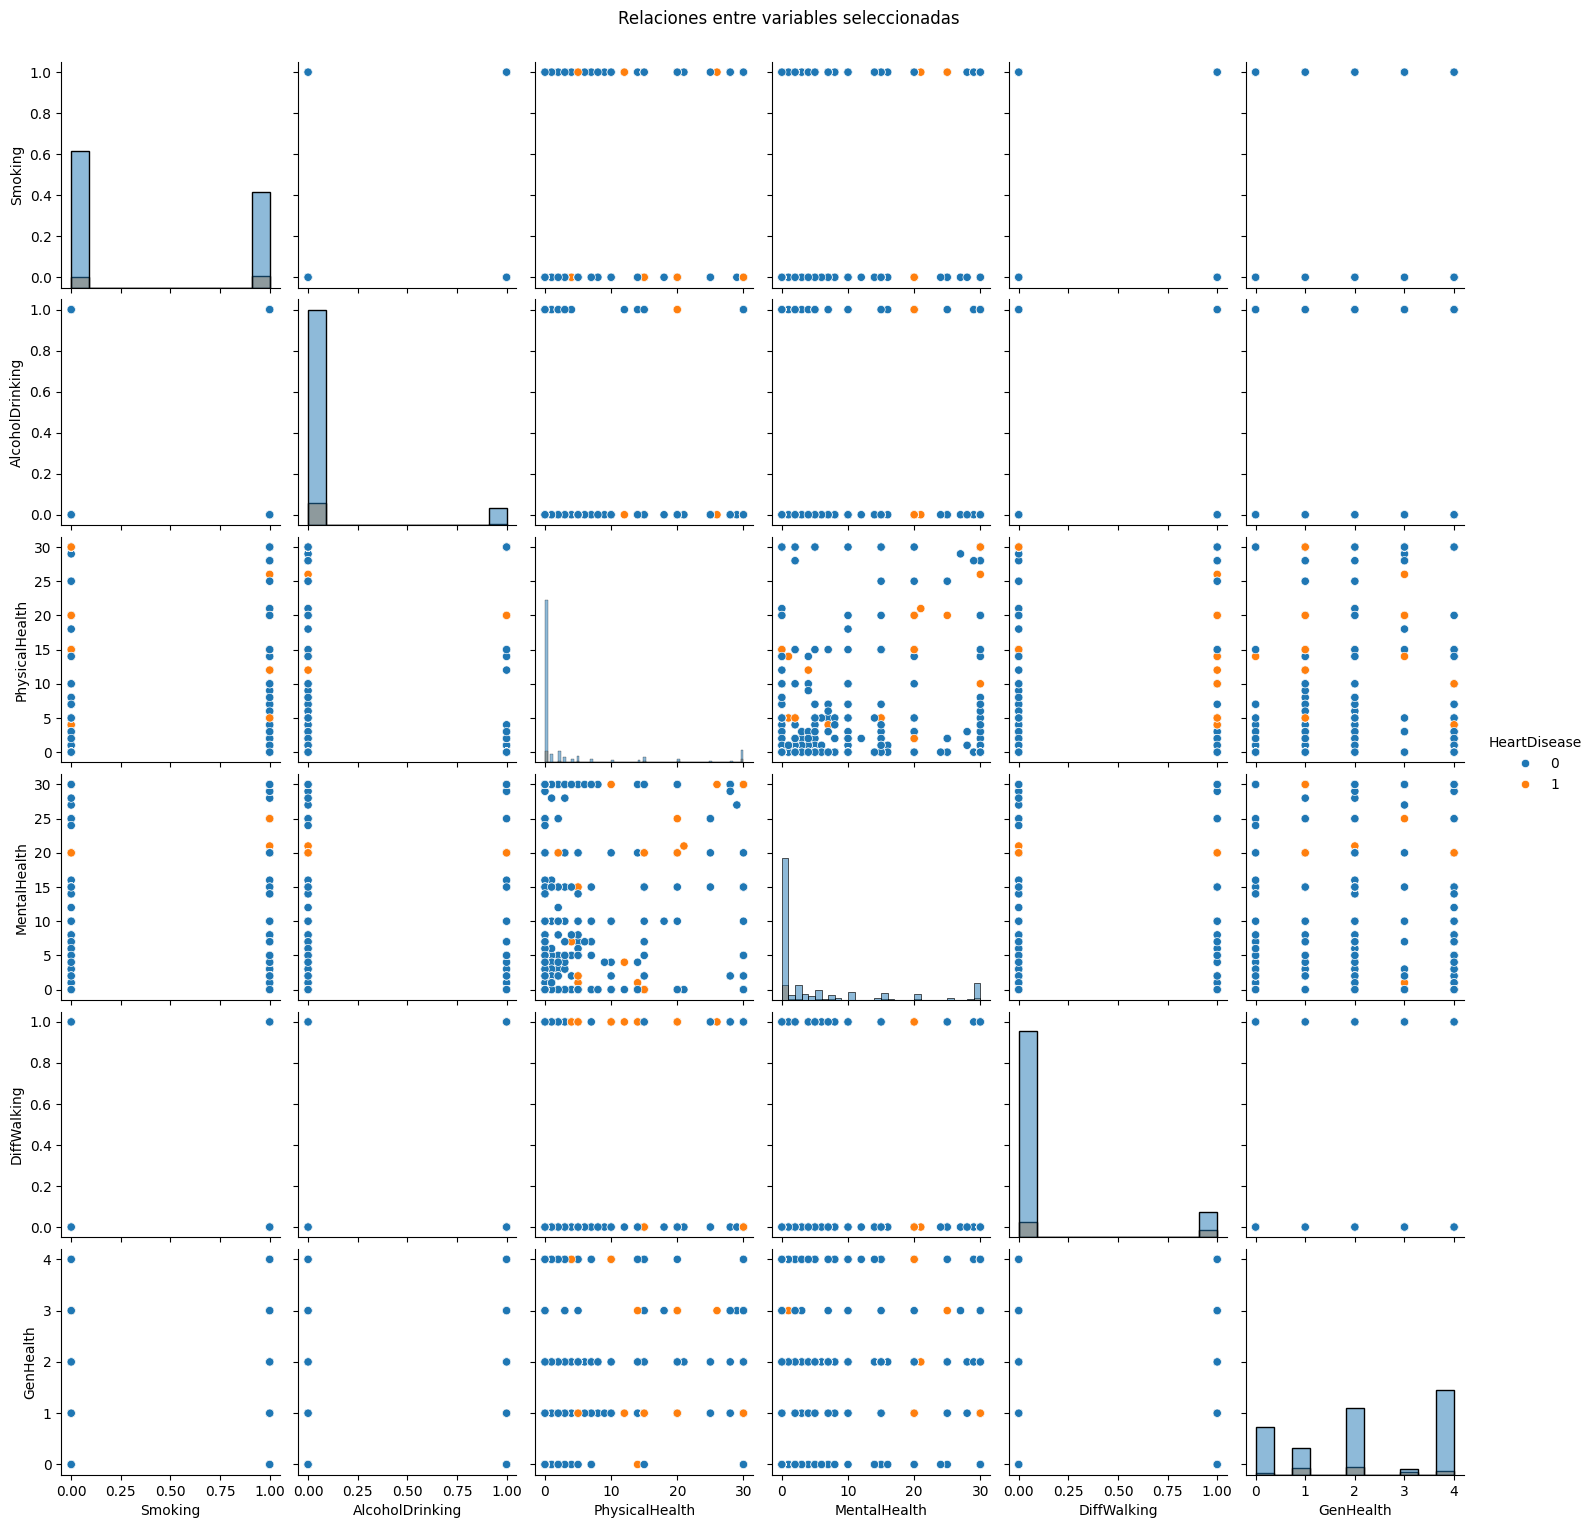

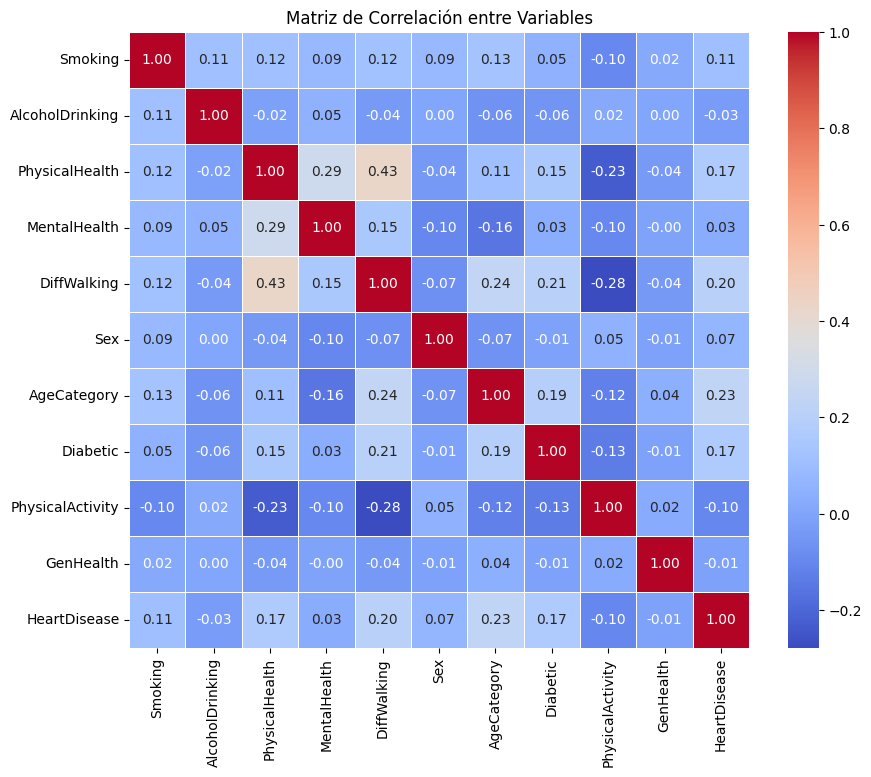

In [ ]:
# Muestra aleatoria de 1000 filas
XDB_sample = XDB.sample(n=1000, random_state=42)

sns.pairplot(XDB_sample, hue='HeartDisease', height=2.5,
             vars=['Smoking', 'AlcoholDrinking', 'PhysicalHealth', 'MentalHealth',
                   'DiffWalking', 'GenHealth'],
             diag_kind='hist')
plt.suptitle("Relaciones entre variables seleccionadas", y=1.02)
plt.show()

# Matriz de correlación completa
plt.figure(figsize=(10, 8))
sns.heatmap(XDB.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Variables')
plt.show()

2. Se procede con la implementación del modelo de
clusterización.

In [ ]:
XD=XDB[['Smoking', 'AlcoholDrinking', 'PhysicalHealth', 'MentalHealth',
           'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic', 'PhysicalActivity',
           'GenHealth']]
yd=XDB[['HeartDisease']]


#Se van a crear cinco montoncitos de datos (perfiles de crédito)
np.random.seed(42)
nc=5
mkm=KMeans(n_clusters=nc,random_state=42)
mkm.fit(XD,yd)
centroids=mkm.cluster_centers_
labels=mkm.labels_
print("Los centroides son:\n",centroids)

#Como quedaron clasificadas las personas
labels=mkm.labels_
XDB['labels']=labels #Adicione a la tabla el cluster al que pertenece un solicitante
display(XDB)

#Caracterizamos los centroides
ND=np.bincount(labels)
print("El tamaño de los clusters es:\n",ND)
NTEC=XDB.groupby('labels').agg({"HeartDisease":lambda x:(x==1).sum()})
TEC=XDB.groupby('labels').agg({"HeartDisease":lambda x:(x==0).sum()})
print("El numero de personas con enfermedades cardiacas por cluster es:\n",TEC)
print("El numero de personas que no tienen enfermedades cardiacas por cluster es:\n",NTEC)

#Se procede con la estimación de los porcentajes de preaprobación
TEC['HeartDisease']=TEC=TEC['HeartDisease']/ND
NTEC['HeartDisease']=NTEC=NTEC['HeartDisease']/ND
print("El porcentaje de personas con enfermedades cardiacas por cluster es:\n",TEC)
print("El porcentaje de personas que no tienen enfermedades cardiacas por cluster es:\n",NTEC)

Los centroides son:
 [[3.23881766e-01 7.77919154e-02 6.96828815e-01 1.97014779e+00
  2.51541548e-02 5.22511500e-01 2.80026427e+00 1.24331996e-01
  8.47205638e-01 2.14350592e+00]
 [4.25404063e-01 5.73318774e-02 7.51949271e-01 6.14545617e-01
  1.29031846e-01 4.75328391e-01 9.01307177e+00 3.59725921e-01
  7.87799255e-01 2.30616168e+00]
 [5.41510811e-01 4.95392756e-02 2.46144512e+01 1.81361190e+00
  5.06659976e-01 4.51966061e-01 8.07002098e+00 5.79189855e-01
  5.40233555e-01 2.04593559e+00]
 [6.16125673e-01 6.73494185e-02 2.57769484e+01 2.52884048e+01
  6.01805242e-01 3.72591564e-01 6.89064399e+00 6.08401319e-01
  4.57038709e-01 2.05025169e+00]
 [4.79625870e-01 1.08359919e-01 1.91081787e+00 2.24050537e+01
  1.30256671e-01 3.61405162e-01 4.69431555e+00 2.65371230e-01
  7.58483179e-01 2.23390371e+00]]


,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,HeartDisease,labels
0,1,0,3,30,0,0,7,2,1,4,0,4
1,0,0,0,0,0,0,12,0,1,4,0,1
2,1,0,20,30,0,1,9,2,1,1,0,3
3,0,0,0,0,0,0,11,0,0,2,0,1
4,0,0,28,0,1,0,4,0,1,4,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,0,7,0,1,1,8,2,0,1,1,1
319791,1,0,0,0,0,1,3,0,1,4,0,0
319792,0,0,0,0,0,0,5,0,1,2,0,0
319793,0,0,0,0,0,0,1,0,0,2,0,0


El tamaño de los clusters es:
 [102160 156606  21922  11512  27595]
El numero de personas con enfermedades cardiacas por cluster es:
         HeartDisease
labels              
0             100804
1             139548
2              17222
3               9064
4              25784
El numero de personas que no tienen enfermedades cardiacas por cluster es:
         HeartDisease
labels              
0               1356
1              17058
2               4700
3               2448
4               1811
El porcentaje de personas con enfermedades cardiacas por cluster es:
 labels
0    0.986727
1    0.891077
2    0.785604
3    0.787352
4    0.934372
Name: HeartDisease, dtype: float64
El porcentaje de personas que no tienen enfermedades cardiacas por cluster es:
 labels
0    0.013273
1    0.108923
2    0.214396
3    0.212648
4    0.065628
Name: HeartDisease, dtype: float64


3. Se procede a evaluar el modelo (matriz de confusión)

In [ ]:
ydp=np.zeros((len(XD),1))
Tec=np.array(TEC);Ntec=np.array(NTEC)

for k in range(len(XD)):
  tec=labels[k]
  print("La persona tal:",k)
  print("El cluster al que pertenece es:",tec)
  print("El procentaje de Aprobación es:",Tec[tec])
  print("El procentaje de Rechazo es:",Ntec[tec])

  if Tec[tec]>Ntec[tec]:
    ydp[k]=1
  else:
    ydp[k]=0



Streaming output truncated to the last 5000 lines.
La persona tal: 318545
El cluster al que pertenece es: 0
El procentaje de Aprobación es: 0.9867267032106499
El procentaje de Rechazo es: 0.013273296789350039
La persona tal: 318546
El cluster al que pertenece es: 1
El procentaje de Aprobación es: 0.8910769702310256
El procentaje de Rechazo es: 0.10892302976897437
La persona tal: 318547
El cluster al que pertenece es: 4
El procentaje de Aprobación es: 0.9343721688711724
El procentaje de Rechazo es: 0.06562783112882768
La persona tal: 318548
El cluster al que pertenece es: 1
El procentaje de Aprobación es: 0.8910769702310256
El procentaje de Rechazo es: 0.10892302976897437
La persona tal: 318549
El cluster al que pertenece es: 1
El procentaje de Aprobación es: 0.8910769702310256
El procentaje de Rechazo es: 0.10892302976897437
La persona tal: 318550
El cluster al que pertenece es: 1
El procentaje de Aprobación es: 0.8910769702310256
El procentaje de Rechazo es: 0.10892302976897437
La per

Evaluación del modelo

In [ ]:
cm=confusion_matrix(yd,ydp)
print("La matriz de confusión es:\n",cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]
Exactitud=(VP+VN)/(VP+VN+FP+FN)
Sensibilidad=VP/(VP+FN)
Especificidad=VN/(VN+FP)
Precisión=VP/(VP+FP)
TasaError=(FP+FN)/(VP+VN+FP+FN)
print("La Exactitud es:",Exactitud)
print("La Sensibilidad es:",Sensibilidad)
print("La Especificidad es:",Especificidad)
print("La Precisión es:",Precisión)
print("La Tasa de Error es:",TasaError)
PredNeg=VN/(VN+FP)

La matriz de confusión es:
 [[     0 292422]
 [     0  27373]]
La Exactitud es: 0.08559545959130067
La Sensibilidad es: 1.0
La Especificidad es: 0.0
La Precisión es: 0.08559545959130067
La Tasa de Error es: 0.9144045404086993


#**Análisis de resultados:**#

El modelo de K-Means clustering fue aplicado para segmentar a los individuos en cinco grupos (clústeres) basados en variables relacionadas con estilos de vida, condiciones de salud y características sociodemográficas. El objetivo del análisis es identificar perfiles de riesgo en relación con la presencia de enfermedades cardíacas, observando la distribución de los individuos por clúster y las características promedio de cada uno.

Rendimiento del Modelo (desde clasificación):
La matriz de confusión muestra que el modelo clasificó a todas las observaciones como positivas (con enfermedad cardíaca), lo cual se traduce en una sensibilidad de 1.0 (detectó el 100% de los casos reales positivos), pero con especificidad de 0.0 (no identificó correctamente a ninguna persona sana). Por ende, la exactitud total es solo del 8.56%, correspondiente a la proporción real de personas enfermas en el dataset. Esto sugiere que, aunque el modelo fue forzado a generar clusters, los grupos resultantes no lograron reflejar adecuadamente la dualidad entre personas con y sin enfermedad.

Todos los clústeres presentan un alto porcentaje de personas con enfermedad cardíaca, desde un 78.5% hasta casi el 99% (en el caso del clúster 0). Esto es anómalo considerando que en la población real solo el 8.56% tiene la enfermedad. Esto sugiere que el modelo de clustering no separó bien a las clases reales, y terminó generando agrupaciones con alto sesgo hacia la clase positiva.

Los centroides nos dan un perfil promedio de cada clúster. A continuación, se interpretan sus principales variables con base en los centroides y su relación con la variable HeartDisease, complementado por la matriz de correlación que compartiste:

1. PhysicalHealth y MentalHealth
Los centroides 2, 3 y 4 muestran valores elevados en estas variables, especialmente el clúster 3, con un promedio de 25 días de mala salud física y mental. Esto coincide con la correlación positiva moderada entre ‘PhysicalHealth’ y ‘HeartDisease’ (0.17) y su interrelación con ‘DiffWalking’ (0.43), evidenciando que quienes reportan más días de malestar tienden a presentar condiciones cardíacas.

2. DiffWalking
Este factor aparece muy elevado en los clústeres 3 y 2 (0.60 y 0.50 respectivamente). Como se muestra en la matriz de correlación, ‘DiffWalking’ tiene una de las correlaciones más fuertes con ‘HeartDisease’ (0.20), confirmando su importancia como variable discriminante en los perfiles de riesgo.

3. AgeCategory
El clúster 1 tiene la edad promedio más alta (9.01), seguido del clúster 2 (8.07) y el clúster 3 (6.89), lo que indica que estos agrupan principalmente a personas mayores. ‘AgeCategory’ está correlacionada con la enfermedad cardíaca en un 0.23, lo que respalda su papel como uno de los predictores más relevantes.

4. Diabetic
Los centroides con valores altos de diabetes (clústeres 2, 3 y 4, con 0.58–0.60) coinciden con clústeres con alta enfermedad cardíaca. Esto es coherente con la correlación positiva de 0.17 entre ‘Diabetic’ y ‘HeartDisease’.

5. PhysicalActivity
Esta variable tiene una correlación negativa (-0.10) con la enfermedad cardíaca y presenta los valores más bajos en los clústeres 2, 3 y 4, que son también los de mayor prevalencia de enfermedad. Esto sugiere que la inactividad física podría actuar como un marcador indirecto del riesgo.

6. GenHealth (autoevaluación de salud)
A pesar de tener una correlación baja con la enfermedad cardíaca (-0.01), los valores de los centroides oscilan entre 2.04 y 2.30, mostrando que la percepción de salud se mantiene entre “regular” y “mala” en todos los grupos, lo que puede no ser suficientemente discriminativo en este contexto.

7. Smoking y AlcoholDrinking
Ambas variables presentan baja correlación con la enfermedad cardíaca (0.11 y -0.03 respectivamente). En los centroides, sus valores son moderados (entre 0.3 y 0.6 para fumadores, y bajos para consumo de alcohol). Esto sugiere que estas variables, al menos en este dataset, no fueron determinantes para la formación de los grupos de alto o bajo riesgo cardíaco.

El modelo de K-Means clustering logró segmentar a la población en cinco grupos distintos en términos de salud y estilo de vida. Sin embargo, estos clústeres no reflejan adecuadamente la distribución real de la enfermedad cardíaca, ya que todos tienden a agrupar mayoritariamente a personas enfermas. Esto puede deberse a dos factores clave: el desbalance extremo en las clases del dataset, y la naturaleza de K-Means, que no considera variables categóricas de manera óptima ni tiene en cuenta la variable objetivo (HeartDisease) durante el agrupamiento.

A pesar de estas limitaciones, el análisis de centroides permite identificar perfiles de riesgo. Clústeres como el 3 y el 2 agrupan a personas de mayor edad, con más días de mal estado físico y mental, mayor dificultad para caminar, mayor prevalencia de diabetes y menos actividad física, lo cual se alinea con factores conocidos de riesgo cardiovascular. Este tipo de análisis puede ser útil como base para diseñar campañas de prevención o intervención diferenciadas.

Para mejorar los resultados, se recomienda:

-Escalar adecuadamente las variables (si no se hizo).

-Aplicar técnicas de clustering mixtas (como K-Prototypes para variables categóricas).

-Reducir dimensionalidad con PCA antes del agrupamiento.

-Evaluar métricas de validación internas (como silueta) para optimizar el número de clústeres.